In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras



In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data(label_mode='fine')


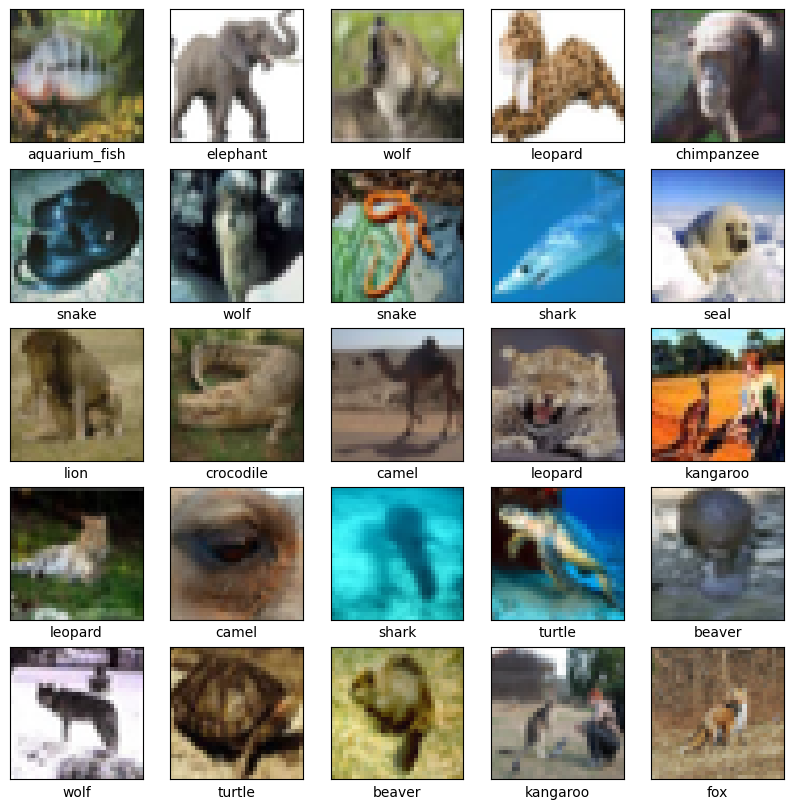

In [9]:
animal_classes = [1,3,4,15,21,27,30,31,34,38,42,43,44,72,73,78,88,93,97]
class_names = {
    1: 'aquarium_fish',
    3: 'bear',
    4: 'beaver',
    15: 'camel',
    21: 'chimpanzee',
    27: 'crocodile',
    30: 'dolphin',
    31: 'elephant',
    34: 'fox',
    38: 'kangaroo',
    42: 'leopard',
    43: 'lion',
    44: 'lizard',
    72: 'seal',
    73: 'shark',
    78: 'snake',
    88: 'tiger',
    93: 'turtle',
    97: 'wolf',
}

animal_filter = np.isin(y_train, animal_classes)
X_train_animals = X_train[animal_filter.flatten()]
y_train_animals = y_train[animal_filter.flatten()]

animal_filter = np.isin(y_test, animal_classes)
X_test_animals = X_test[animal_filter.flatten()]
y_test_animals = y_test[animal_filter.flatten()]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_animals[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_animals[i].item()])
plt.show()